<a href="https://colab.research.google.com/github/sarnavadatta/Finance-in-Python/blob/main/Vector_Auto_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 Vector Autoregression (VAR) Model

## 🔹 Introduction

**Vector Autoregression (VAR)** is a multivariate time series model that captures the **linear interdependencies** among multiple variables.  
Unlike univariate autoregressive (AR) models, VAR treats **all variables as endogenous**.  
It is widely used in **econometrics, finance, and macroeconomic forecasting**.

---

## 🔹 Mathematical Formulation

Suppose we have \(k\) time series variables, collected in a vector:

$$
\mathbf{y}_t =
\begin{bmatrix}
y_{1t} \\
y_{2t} \\
\vdots \\
y_{kt}
\end{bmatrix}
$$

A **VAR(p)** model of order \(p\) is defined as:

$$
\mathbf{y}_t = \mathbf{c} + A_1 \mathbf{y}_{t-1} + A_2 \mathbf{y}_{t-2} + \dots + A_p \mathbf{y}_{t-p} + \mathbf{u}_t
$$

where:

- $\mathbf{y}_t \in \mathbb{R}^k$: vector of variables at time \(t\)  
- $\mathbf{c} \in \mathbb{R}^k$: constant/intercept vector  
- $A_i \in \mathbb{R}^{k \times k}$: coefficient matrices for lag $i$  
- $\mathbf{u}_t \sim \mathcal{N}(0, \Sigma)$: vector of white-noise errors with covariance matrix $\Sigma$

---

## 🔹 Example: 2-variable VAR(1)

If we have **GDP growth** $(g_t)$ and **Inflation** $(\pi_t)$, then a VAR(1) model looks like:

$$
\begin{bmatrix}
g_t \\
\pi_t
\end{bmatrix}
=
\begin{bmatrix}
c_1 \\
c_2
\end{bmatrix}
+
\begin{bmatrix}
a_{11} & a_{12} \\
a_{21} & a_{22}
\end{bmatrix}
\begin{bmatrix}
g_{t-1} \\
\pi_{t-1}
\end{bmatrix}
+
\begin{bmatrix}
u_{1t} \\
u_{2t}
\end{bmatrix}
$$

Here:

- $g_t$ depends on its own lag $(g_{t-1})$ and lagged inflation $(\pi_{t-1})$  
- $\pi_t$ depends on lagged GDP $(g_{t-1})$ and lagged inflation $(\pi_{t-1})$

---

## 🔹 Stationarity Condition
For the VAR to be stable, the **roots of the characteristic polynomial** must lie outside the unit circle:

$$
\det \left( I_k - A_1 z - A_2 z^2 - \cdots - A_p z^p \right) \neq 0 \quad \text{for} \quad |z| \leq 1
$$

---

## 🔹 Forecasting

One-step ahead forecast:

$$
\hat{\mathbf{y}}_{t+1} = \mathbf{c} + A_1 \mathbf{y}_{t} + A_2 \mathbf{y}_{t-1} + \cdots + A_p \mathbf{y}_{t-p+1}
$$

---

## 🔹 Impulse Response Function (IRF)

An **Impulse Response Function (IRF)** shows how a shock in one variable affects the future values of all variables.

If $\mathbf{u}_t = e_j$ (a one-unit shock in variable $j$), the response at horizon $h$ is:

$$
IRF(h, j) = \frac{\partial \mathbf{y}_{t+h}}{\partial u_{jt}}
$$

---

## 🔹 Forecast Error Variance Decomposition (FEVD)

FEVD quantifies how much of the variance in the forecast error of variable $i$ at horizon $h$ is explained by shocks to variable $j$:

$$
\text{FEVD}_h(i,j) = \frac{\text{Var} \left( \text{error in } y_{i,t+h} \text{ due to } u_j \right)}{\text{Total Var} \left( \text{error in } y_{i,t+h} \right)}
$$

---

## ✅ Summary

- VAR generalizes univariate AR models to **multivariate systems**  
- Each variable is a function of **its own lags** and **lags of all other variables**  
- Tools: **Stationarity tests (ADF)**, **Granger causality**, **Impulse Response Functions (IRF)**, **FEVD**, **SVAR**


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as pdr

#Load & prepare data
We’ll use monthly data since 1990:
- CPIAUCSL: CPI for All Urban Consumers (price level → take log difference for monthly inflation)
- INDPRO: Industrial Production Index (log difference to get output growth)
- UNRATE: Unemployment rate (difference to encourage stationarity)
- FEDFUNDS: Federal Funds Rate (difference to encourage stationarity)

In [ ]:

start = "1990-01-01"
end = None  # up to most recent

series = ["CPIAUCSL", "INDPRO", "UNRATE", "FEDFUNDS"]
df_raw = pdr.DataReader(series, "fred", start=start, end=end)


# Construct stationary transformations:
# Inflation and IP growth as monthly % changes via log-diffs; differences for rates.
df = pd.DataFrame({
    "inflation_m": 100 * np.log(df_raw["CPIAUCSL"]).diff(),     # monthly inflation in %
    "indpro_growth_m": 100 * np.log(df_raw["INDPRO"]).diff(),       # monthly IP growth in %
    "d_unemp_rate": df_raw["UNRATE"].diff(),                        # Δ Unemployment
    "d_fedfundrate": df_raw["FEDFUNDS"].diff()                          # Δ Fed Funds
}).dropna()

df

,inflation_m,indpro_growth_m,d_unemp_rate,d_fedfundrate
DATE,,,,
1990-02-01,0.391390,0.904308,-0.1,0.01
1990-03-01,0.467655,0.475593,-0.1,0.04
1990-04-01,0.233010,-0.225083,0.2,-0.02
1990-05-01,0.155039,0.294988,0.0,-0.08
1990-06-01,0.617763,0.339391,-0.2,0.11
...,...,...,...,...
2025-02-01,0.215696,1.024280,0.1,0.00
2025-03-01,-0.050048,-0.261551,0.1,0.00
2025-04-01,0.220647,0.022184,0.0,0.00


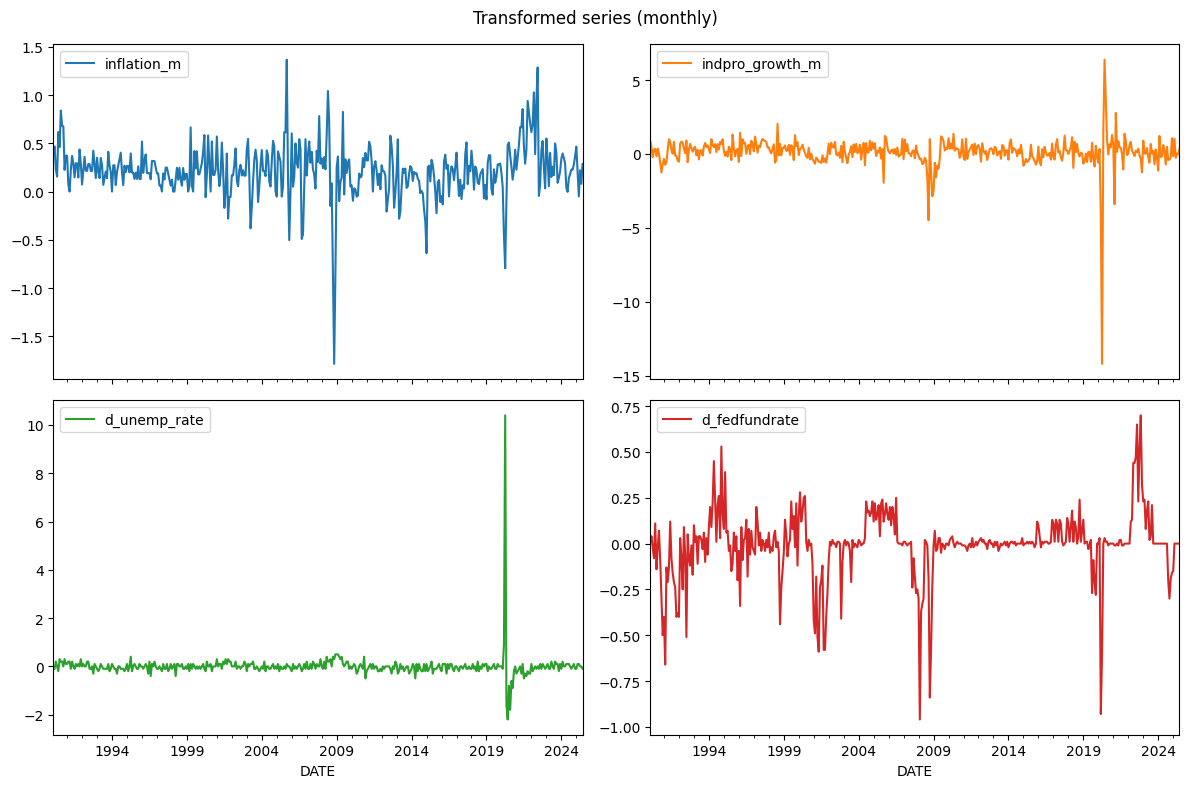

In [ ]:
df.plot(subplots=True, figsize=(12,8), title="Transformed series (monthly)", layout=(2,2))
plt.tight_layout();
plt.show()

stationarity checks: Augmented Dickey-Fuller (ADF) on each transformed series.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_report(x, name):
    res = adfuller(x.dropna(), autolag="AIC")
    print(f"{name:12s} | ADF stat: {res[0]:8.3f} | p-value: {res[1]:.4f}")

for col in df.columns:
    adf_report(df[col], col)


inflation_m  | ADF stat:   -3.971 | p-value: 0.0016
indpro_growth_m | ADF stat:  -15.148 | p-value: 0.0000
d_unemp_rate | ADF stat:  -12.145 | p-value: 0.0000
d_fedfundrate | ADF stat:   -4.461 | p-value: 0.0002


In [ ]:
# Train-Test split
split_date = df.index[-24]  # last 24 months for test
train = df.loc[:split_date - pd.offsets.MonthBegin(0)]
test = df.loc[split_date:]
train.shape, test.shape

((402, 4), (24, 4))

In [ ]:
# Fit a VAR and choose lag order
# Use AIC to select the lag length (up to 12 months).

from statsmodels.tsa.api import VAR

model = VAR(train)
sel = model.select_order(maxlags=12)
print("Lag order selection criteria:")
print(sel.summary())

lag_order = sel.selected_orders.get("aic", 6)  # fallback to 6 if AIC not present
print("Selected lag order (AIC):", lag_order)

results = model.fit(lag_order)
print(results.summary())
print("Is the VAR stable (all roots < 1)?", results.is_stable())

Lag order selection criteria:
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -7.951      -7.910   0.0003523      -7.935
1       -8.737      -8.533   0.0001606      -8.656
2       -8.921     -8.554*   0.0001336     -8.775*
3       -8.977      -8.448   0.0001263      -8.767
4       -8.951      -8.260   0.0001296      -8.677
5       -8.985      -8.131   0.0001253      -8.647
6      -8.988*      -7.971  0.0001249*      -8.585
7       -8.939      -7.759   0.0001313      -8.471
8       -8.898      -7.555   0.0001369      -8.366
9       -8.876      -7.371   0.0001401      -8.279
10      -8.924      -7.256   0.0001336      -8.263
11      -8.906      -7.075   0.0001362      -8.180
12      -8.886      -6.893   0.0001390      -8.096
--------------------------------------------------
Selected lag order (AIC): 6
  Summary of Regression Results   
Model:                         VAR
Metho

# Residual diagnostics
- **Serial correlation**: Durbin-Watson near 2 suggests little autocorrelation.
- **Ljung–Box**: test for residual autocorrelation at multiple lags.
- **Normality**: Jarque–Bera on each residual series.

In [ ]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera

# Durbin–Watson
dw_stats = durbin_watson(results.resid)
print("\nDurbin–Watson by variable:")
for col, val in zip(train.columns, dw_stats):
    print(f"  {col:12s}: {val:5.2f}")


# Ljung–Box per residual series at lag 12
resid_df = results.resid  # DataFrame
print("\nLjung–Box (lag=12) p-values by variable:")

for col in resid_df.columns:
    x = resid_df[col].dropna().to_numpy()
    L = max(1, min(12, len(x) - 2))
    p = acorr_ljungbox(x, lags=[L], return_df=True)['lb_pvalue'].iloc[-1]
    print(f"  {col:12s}: p={p:.4f} (lag={L})")


# Jarque–Bera normality test per residual series
print("\nJarque–Bera p-values by variable:")

for col in resid_df.columns:
    series_i = resid_df[col].dropna().to_numpy()  # convert to 1-D array
    jb_stat, jb_p, _, _ = jarque_bera(series_i)
    print(f"  {col:12s}: p={jb_p:.4f}")




Durbin–Watson by variable:
  inflation_m :  1.98
  indpro_growth_m:  1.99
  d_unemp_rate:  2.01
  d_fedfundrate:  2.00

Ljung–Box (lag=12) p-values by variable:
  inflation_m : p=0.0457 (lag=12)
  indpro_growth_m: p=0.4315 (lag=12)
  d_unemp_rate: p=0.7349 (lag=12)
  d_fedfundrate: p=0.9680 (lag=12)

Jarque–Bera p-values by variable:
  inflation_m : p=0.0000
  indpro_growth_m: p=0.0000
  d_unemp_rate: p=0.0000
  d_fedfundrate: p=0.0000


In [ ]:
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.stats.diagnostic import acorr_ljungbox

# 1) Durbin–Watson (your code is fine)
dw_stats = durbin_watson(results.resid)
print("\nDurbin–Watson by variable:")
for col, val in zip(train.columns, dw_stats):
    print(f"  {col:12s}: {val:5.2f}")

# Helper: pick a safe lag (<= len(series)-2) so Ljung–Box won't error on short samples
def safe_lag(x, desired=12):
    return max(1, min(desired, len(x) - 2))

# 2) Ljung–Box per residual series at lag 12 (robust to DataFrame/ndarray)
print("\nLjung–Box (lag=12) p-values by variable:")
resid = results.resid
for i, col in enumerate(train.columns):
    # Get a 1-D residual series for this variable
    if hasattr(resid, "iloc"):         # DataFrame case
        series_i = resid.iloc[:, i].to_numpy()
    else:                              # NumPy ndarray case
        series_i = resid[:, i]

    L = safe_lag(series_i, 12)
    lb = acorr_ljungbox(series_i, lags=[L], return_df=True)
    print(f"  {col:12s}: p={lb['lb_pvalue'].iloc[-1]:.4f} (lag={L})")

# 3) Jarque–Bera normality test per residual series (same robustness)
print("\nJarque–Bera p-values by variable:")
for i, col in enumerate(train.columns):
    if hasattr(resid, "iloc"):
        series_i = resid.iloc[:, i].to_numpy()
    else:
        series_i = resid[:, i]
    jb_stat, jb_p, _, _ = jarque_bera(series_i)
    print(f"  {col:12s}: p={jb_p:.4f}")



Durbin–Watson by variable:
  inflation_m :  1.98
  indpro_growth_m:  1.99
  d_unemp_rate:  2.01
  d_fedfundrate:  2.00

Ljung–Box (lag=12) p-values by variable:
  inflation_m : p=0.0457 (lag=12)
  indpro_growth_m: p=0.4315 (lag=12)
  d_unemp_rate: p=0.7349 (lag=12)
  d_fedfundrate: p=0.9680 (lag=12)

Jarque–Bera p-values by variable:
  inflation_m : p=0.0000
  indpro_growth_m: p=0.0000
  d_unemp_rate: p=0.0000
  d_fedfundrate: p=0.0000


**Impulse Response Functions (IRFs)**:
IRFs trace the dynamic reaction of each variable to a one-time shock in a variable (e.g., a monetary policy shock to ΔFed Funds).

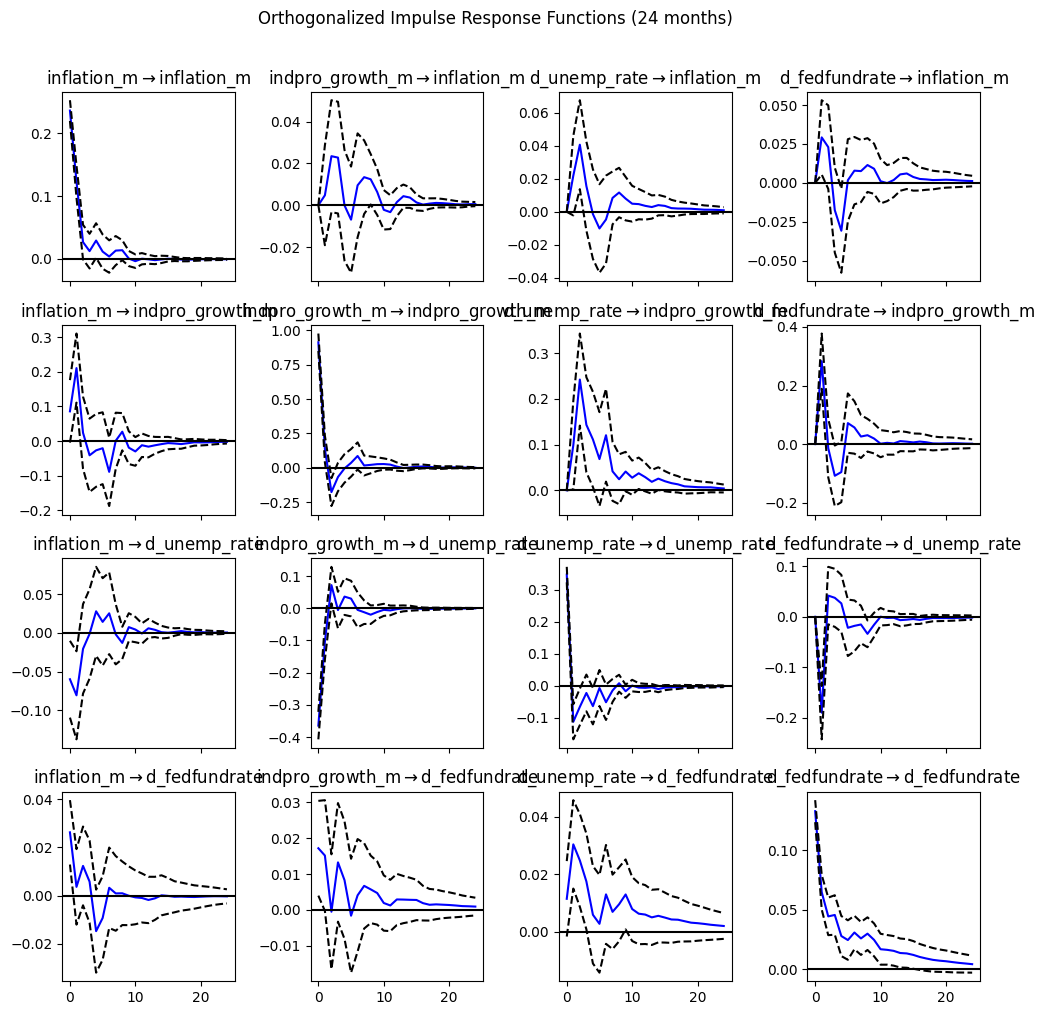

In [ ]:
irf = results.irf(24)  # 24 months horizon
fig = irf.plot(orth=True)
plt.suptitle("Orthogonalized Impulse Response Functions (24 months)", y=1.01)
plt.subplots_adjust(wspace=1.5) # Adjust horizontal space
plt.tight_layout(); plt.show()

**Forecast Error Variance Decomposition (FEVD)**:
FEVD shows what fraction of the forecast error variance of each variable is explained by shocks to each variable at different horizons.

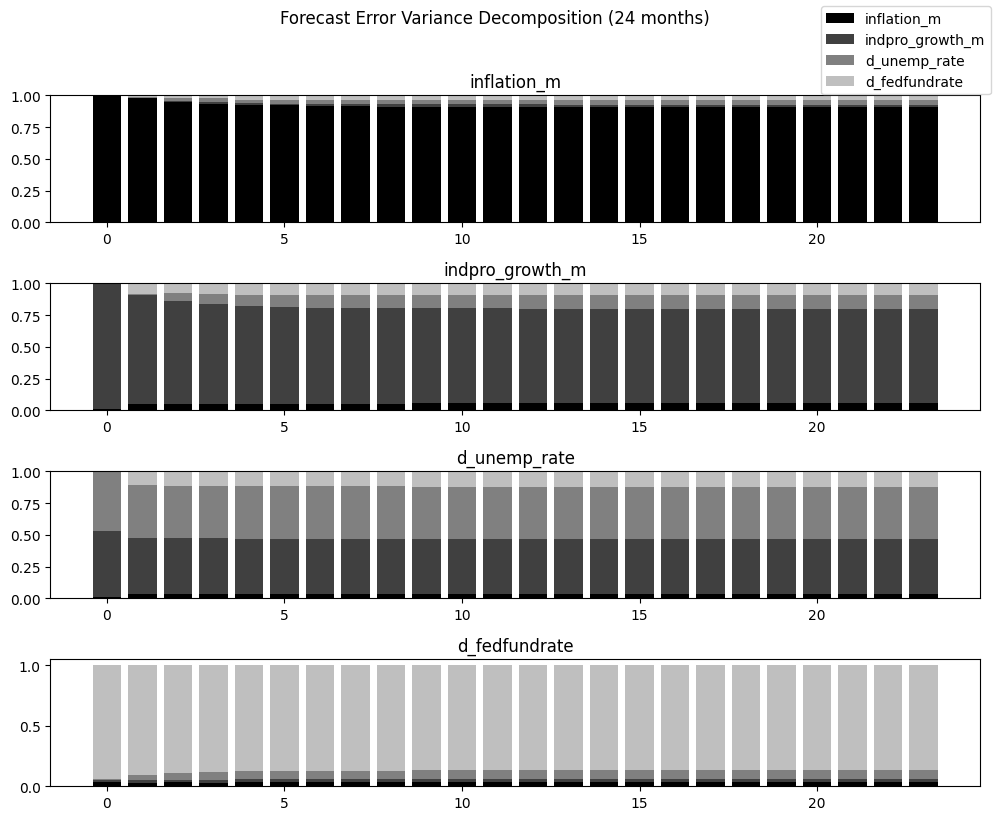


FEVD at 12 months:
FEVD for inflation_m
      inflation_m  indpro_growth_m  d_unemp_rate  d_fedfundrate
0        1.000000         0.000000      0.000000       0.000000
1        0.981306         0.000311      0.006622       0.011761
2        0.946177         0.007537      0.028128       0.018159
3        0.933177         0.014133      0.030830       0.021860
4        0.922690         0.013808      0.030147       0.033355
5        0.921051         0.014359      0.031322       0.033269
6        0.919058         0.015464      0.031519       0.033959
7        0.915702         0.017621      0.032215       0.034462
8        0.911121         0.019393      0.033666       0.035820
9        0.909024         0.019842      0.034381       0.036752
10       0.908698         0.019891      0.034664       0.036746
11       0.908330         0.020019      0.034920       0.036732
12       0.908122         0.020041      0.035074       0.036763
13       0.907491         0.020257      0.035152       0.037100

In [ ]:
fevd = results.fevd(24)
fevd.plot(figsize=(10,8))
plt.suptitle("Forecast Error Variance Decomposition (24 months)", y=1.02)
plt.tight_layout(); plt.show()

# Tabular view at 12 months:
print("\nFEVD at 12 months:")
print(fevd.summary())

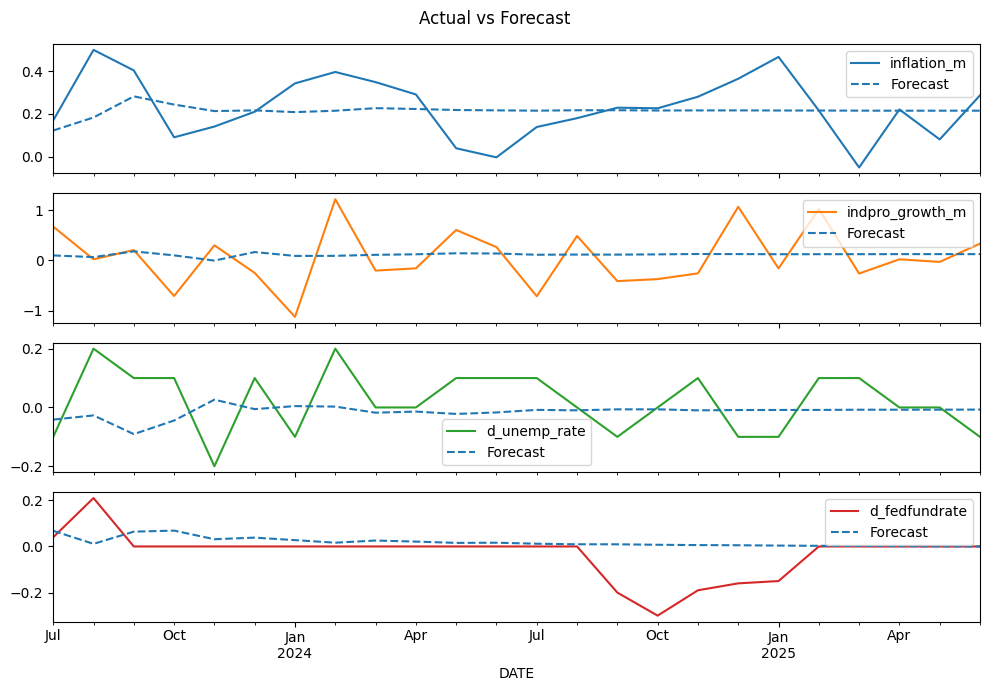


RMSE by series over test window:
inflation_m        0.142058
indpro_growth_m    0.573782
d_unemp_rate       0.118138
d_fedfundrate      0.108416
dtype: float64


In [ ]:
# Prepare the last 'lag_order' observations for the VAR's initial state
y0 = train.values[-lag_order:]
forecast_steps = len(test)

fc = results.forecast(y0, steps=forecast_steps)
fc_df = pd.DataFrame(fc, index=test.index, columns=train.columns)

# Compare with test data
ax = test[train.columns].plot(figsize=(10,7), subplots=True, sharex=True, title="Actual vs Forecast")
for i, col in enumerate(train.columns):
    fc_df[col].plot(ax=ax[i], style="--", label="Forecast")
    ax[i].legend()
plt.tight_layout(); plt.show()

# RMSE
rmse = ((fc_df - test)**2).mean().pow(0.5)
print("\nRMSE by series over test window:")
print(rmse)